In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
# Loading the data set of all fixtures over the past 5 years

Finalfixlist2020=pd.read_csv('Finalfixlist2020.csv')
Finalfixlist2019=pd.read_csv('Finalfixlist2019.csv')
Finalfixlist2018=pd.read_csv('Finalfixlist2018.csv')
Finalfixlist2017=pd.read_csv('Finalfixlist2017.csv')
Finalfixlist2016=pd.read_csv('Finalfixlist2016.csv')

# Calculating implied probabilites from the bookmaker odds
Finalfixlist2020['ImpliedH']=1/Finalfixlist2020['AvgH']
Finalfixlist2019['ImpliedH']=1/Finalfixlist2019['BbAvH']
Finalfixlist2018['ImpliedH']=1/Finalfixlist2018['BbAvH']
Finalfixlist2017['ImpliedH']=1/Finalfixlist2017['BbAvH']
Finalfixlist2016['ImpliedH']=1/Finalfixlist2016['BbAvH']

Finalfixlist2020['ImpliedD']=1/Finalfixlist2020['AvgD']
Finalfixlist2019['ImpliedD']=1/Finalfixlist2019['BbAvD']
Finalfixlist2018['ImpliedD']=1/Finalfixlist2018['BbAvD']
Finalfixlist2017['ImpliedD']=1/Finalfixlist2017['BbAvD']
Finalfixlist2016['ImpliedD']=1/Finalfixlist2016['BbAvD']

Finalfixlist2020['ImpliedA']=1/Finalfixlist2020['AvgA']
Finalfixlist2019['ImpliedA']=1/Finalfixlist2019['BbAvA']
Finalfixlist2018['ImpliedA']=1/Finalfixlist2018['BbAvA']
Finalfixlist2017['ImpliedA']=1/Finalfixlist2017['BbAvA']
Finalfixlist2016['ImpliedA']=1/Finalfixlist2016['BbAvA']

# Combined_fixlist is the training data set
frames=[Finalfixlist2019,Finalfixlist2018,Finalfixlist2017,Finalfixlist2016]
combined_fixlist=pd.concat(frames,sort=False)
combined_fixlist.reset_index(drop=True)

# combined_fixlist2 is the test data set
frames2=[Finalfixlist2020]
combined_fixlist2=pd.concat(frames2,sort=False)
combined_fixlist2.reset_index(drop=True)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Poss_y,CrdY_x,CrdR_x,CrdY_y,CrdR_y,Home Form,Away Form,ImpliedH,ImpliedD,ImpliedA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,57.6,39,2,79,1,0,0,0.877193,0.114286,0.050429
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,67.8,59,1,44,1,0,0,0.084459,0.159236,0.800000
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,52.1,60,1,75,3,0,0,0.497512,0.283286,0.261097
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,43.9,75,1,73,3,0,0,0.373134,0.310559,0.359712
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,51.5,58,2,56,4,0,0,0.319489,0.305810,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,E0,07/03/2020,15:00,Wolves,Brighton,0,0,D,0,0,...,42.6,73,1,61,4,9,2,0.606061,0.253165,0.182482
284,E0,07/03/2020,17:30,Burnley,Tottenham,1,1,D,1,0,...,58.9,75,1,57,3,9,3,0.367647,0.303030,0.371747
285,E0,08/03/2020,14:00,Chelsea,Everton,4,0,H,2,0,...,51.5,49,0,56,4,9,3,0.534759,0.267380,0.238095
286,E0,08/03/2020,16:30,Man United,Man City,2,0,H,1,0,...,67.8,75,4,44,1,11,3,0.198413,0.233645,0.609756


In [4]:
# Combining Pts scored by the home team and away team to create a single measure 'lastseasonptdiff' that measures the difference between the teams last season
combined_fixlist['Lastseasptdiff']=combined_fixlist['Pts']-combined_fixlist['Pts.1']
combined_fixlist2['Lastseasptdiff']=combined_fixlist2['Pts']-combined_fixlist2['Pts.1']


# Draw predictor

In [5]:
for i in range(combined_fixlist[['FTR']].shape[0]):
    if combined_fixlist['FTR'].iloc[i]!='D':
        combined_fixlist['FTR'].iloc[i]='ND'

for i in range(combined_fixlist2[['FTR']].shape[0]):
    if combined_fixlist2['FTR'].iloc[i]!='D':
        combined_fixlist2['FTR'].iloc[i]='ND'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
features=combined_fixlist[['ImpliedH','ImpliedD','ImpliedA','Lastseasptdiff','Home Form','Away Form','Poss_x','Poss_y','CrdY_x','CrdY_y']]
target=combined_fixlist[['FTR']]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = .01, random_state = 140)

features2=combined_fixlist2[['ImpliedH','ImpliedD','ImpliedA','Lastseasptdiff','Home Form','Away Form','Poss_x','Poss_y','CrdY_x','CrdY_y']]
target2=combined_fixlist2[['FTR']]
features_train2, features_test2, target_train2, target_test2 = train_test_split(features2, target2, test_size = 0.99, random_state = 140)


regrd = LogisticRegression(class_weight='balanced') 
regrd.fit(features_train, target_train)
predicteddraw = regrd.predict(features_test2)
predicteddraw_prob = regrd.predict_proba(features_test2)
report=classification_report(target_test2,predicteddraw,output_dict=True)
print(classification_report(target_test2,predicteddraw))

              precision    recall  f1-score   support

           D       0.33      0.69      0.44        71
          ND       0.84      0.53      0.65       215

    accuracy                           0.57       286
   macro avg       0.58      0.61      0.55       286
weighted avg       0.71      0.57      0.60       286



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Home win predictor

In [7]:
frames=[Finalfixlist2019,Finalfixlist2018,Finalfixlist2017,Finalfixlist2016]
combined_fixlist=pd.concat(frames,sort=False)
combined_fixlist.reset_index(drop=True)

frames2=[Finalfixlist2020]
combined_fixlist2=pd.concat(frames2,sort=False)
combined_fixlist2.reset_index(drop=True)

combined_fixlist['Lastseasptdiff']=combined_fixlist['Pts']-combined_fixlist['Pts.1']
combined_fixlist2['Lastseasptdiff']=combined_fixlist2['Pts']-combined_fixlist2['Pts.1']

In [8]:
for i in range(combined_fixlist[['FTR']].shape[0]):
    if combined_fixlist['FTR'].iloc[i]!='H':
        combined_fixlist['FTR'].iloc[i]='NH'

for i in range(combined_fixlist2[['FTR']].shape[0]):
    if combined_fixlist2['FTR'].iloc[i]!='H':
        combined_fixlist2['FTR'].iloc[i]='NH'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
features=combined_fixlist[['ImpliedH','ImpliedD','ImpliedA','Lastseasptdiff','Home Form','Away Form','Poss_x','Poss_y','CrdY_x','CrdY_y']]
target=combined_fixlist[['FTR']]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = .01, random_state = 140)

features2=combined_fixlist2[['ImpliedH','ImpliedD','ImpliedA','Lastseasptdiff','Home Form','Away Form','Poss_x','Poss_y','CrdY_x','CrdY_y']]
target2=combined_fixlist2[['FTR']]
features_train2, features_test2, target_train2, target_test2 = train_test_split(features2, target2, test_size = 0.99, random_state = 140)


regrh = LogisticRegression(class_weight='balanced') 
regrh.fit(features_train, target_train)
predictedhome = regrh.predict(features_test2)
predictedhome_prob = regrh.predict_proba(features_test2)
report=classification_report(target_test2,predictedhome,output_dict=True)
print(classification_report(target_test2,predictedhome))

              precision    recall  f1-score   support

           H       0.64      0.59      0.62       128
          NH       0.69      0.73      0.71       158

    accuracy                           0.67       286
   macro avg       0.66      0.66      0.66       286
weighted avg       0.67      0.67      0.67       286



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Away win predictor

In [10]:
frames=[Finalfixlist2019,Finalfixlist2018,Finalfixlist2017,Finalfixlist2016]
combined_fixlist=pd.concat(frames,sort=False)
combined_fixlist.reset_index(drop=True)

frames2=[Finalfixlist2020]
combined_fixlist2=pd.concat(frames2,sort=False)
combined_fixlist2.reset_index(drop=True)

combined_fixlist['Lastseasptdiff']=combined_fixlist['Pts']-combined_fixlist['Pts.1']
combined_fixlist2['Lastseasptdiff']=combined_fixlist2['Pts']-combined_fixlist2['Pts.1']

In [11]:
for i in range(combined_fixlist[['FTR']].shape[0]):
    if combined_fixlist['FTR'].iloc[i]!='A':
        combined_fixlist['FTR'].iloc[i]='NA'

for i in range(combined_fixlist2[['FTR']].shape[0]):
    if combined_fixlist2['FTR'].iloc[i]!='A':
        combined_fixlist2['FTR'].iloc[i]='NA'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
features=combined_fixlist[['ImpliedH','ImpliedD','ImpliedA','Lastseasptdiff','Home Form','Away Form','Poss_x','Poss_y','CrdY_x','CrdY_y']]
target=combined_fixlist[['FTR']]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = .01, random_state = 140)

features2=combined_fixlist2[['ImpliedH','ImpliedD','ImpliedA','Lastseasptdiff','Home Form','Away Form','Poss_x','Poss_y','CrdY_x','CrdY_y']]
target2=combined_fixlist2[['FTR']]
features_train2, features_test2, target_train2, target_test2 = train_test_split(features2, target2, test_size = 0.99, random_state = 140)


regra = LogisticRegression(class_weight='balanced') 
regra.fit(features_train, target_train)
predictedaway = regra.predict(features_test2)
predictedaway_prob = regra.predict_proba(features_test2)
report=classification_report(target_test2,predictedaway,output_dict=True)
print(classification_report(target_test2,predictedaway))

              precision    recall  f1-score   support

           A       0.44      0.70      0.54        87
          NA       0.82      0.61      0.70       199

    accuracy                           0.64       286
   macro avg       0.63      0.66      0.62       286
weighted avg       0.71      0.64      0.65       286



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Combining all 3 classifiers

In [13]:
predictedcombo=['D']*len(predictedaway)
for i in range(len(predictedcombo)):
    if (predictedaway_prob[i,0]>predicteddraw_prob[i,0]) and (predictedaway_prob[i,0]>predicteddraw_prob[i,0]):
        predictedcombo[i]='A'
    elif (predictedhome_prob[i,0]>predicteddraw_prob[i,0]) and (predictedhome_prob[i,0]>predicteddraw_prob[i,0]):
        predictedcombo[i]='H'

In [14]:
frames2=[Finalfixlist2020]
combined_fixlist2=pd.concat(frames2,sort=False)
combined_fixlist2.reset_index(drop=True)
combined_fixlist2['Lastseasptdiff']=combined_fixlist2['Pts']-combined_fixlist2['Pts.1']

features2=combined_fixlist2[['ImpliedH','ImpliedD','ImpliedA','Lastseasptdiff','Home Form','Away Form','Poss_x','Poss_y','CrdY_x','CrdY_y']]
target2=combined_fixlist2[['FTR']]

features_train2, features_test2, target_train2, target_test2 = train_test_split(features2, target2, test_size = 0.99, random_state = 140)

report_combo=classification_report(target_test2,predictedcombo,output_dict=True)
print(classification_report(target_test2,predictedcombo))

              precision    recall  f1-score   support

           A       0.47      0.57      0.52        87
           D       0.36      0.35      0.36        71
           H       0.66      0.57      0.61       128

    accuracy                           0.52       286
   macro avg       0.50      0.50      0.50       286
weighted avg       0.53      0.52      0.52       286



(3, 0)

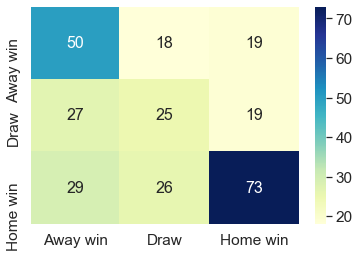

In [15]:
from sklearn import metrics
cm=metrics.confusion_matrix(target_test2,predictedcombo)
df_cm = pd.DataFrame(cm, index = [i for i in ['Away win','Draw','Home win']],
                  columns = [i for i in ['Away win','Draw', 'Home win']])

#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) 
ax=sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap="YlGnBu",fmt='g')
ax.set_ylim(len(df_cm), 0)

In [16]:
fav=['D']*len(predictedaway)
for i in range(len(fav)):
    if (features_test2.iloc[i,0]>features_test2.iloc[i,1]) and (features_test2.iloc[i,0]>features_test2.iloc[i,2]):
        fav[i]='H'
    elif (features_test2.iloc[i,1]>features_test2.iloc[i,0]) and (features_test2.iloc[i,1]>features_test2.iloc[i,2]):
        fav[i]='D'
    else:
        fav[i]='A'
report_fav=classification_report(target_test2,fav,output_dict=True)
print(classification_report(target_test2,fav))

              precision    recall  f1-score   support

           A       0.52      0.57      0.55        87
           D       0.00      0.00      0.00        71
           H       0.54      0.80      0.64       128

    accuracy                           0.53       286
   macro avg       0.35      0.46      0.40       286
weighted avg       0.40      0.53      0.45       286



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(3, 0)

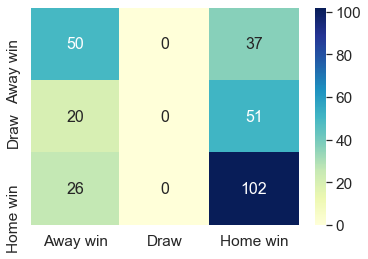

In [17]:
from sklearn import metrics
cm=metrics.confusion_matrix(target_test2,fav)
df_cm = pd.DataFrame(cm, index = [i for i in ['Away win','Draw','Home win']],
                  columns = [i for i in ['Away win','Draw', 'Home win']])

#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) 
ax=sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap="YlGnBu",fmt='g')
ax.set_ylim(len(df_cm), 0)

# Plots for presentation

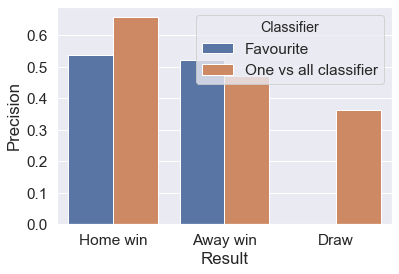

In [18]:
precisiondf1=pd.DataFrame(data=report_fav).T
precisiondf2=pd.DataFrame(data=report_combo).T
precisiondf1=precisiondf1[['precision']].iloc[0:3]
precisiondf2=precisiondf2[['precision']].iloc[0:3]
precisiondf1['Class']='Bet on favourite'
precisiondf2['Class']='One vs all classifier'
data={'Result':['Home win','Away win','Draw','Home win','Away win','Draw'],'Classifier':['Favourite','Favourite','Favourite','One vs all classifier','One vs all classifier','One vs all classifier'],'Precision':[report_fav['H']['precision'],report_fav['A']['precision'],report_fav['D']['precision'],report_combo['H']['precision'],report_combo['A']['precision'],report_combo['D']['precision']]}
dfprecision=pd.DataFrame(data=data)
ax = sns.barplot(x="Result", y="Precision", hue="Classifier", data=dfprecision)
plt.savefig('model_performance.png', dpi=600)

## Betting strategies comparison chart

In [19]:
# Bet on all draws predicted by Classifier
money_return=0
count=0
for i in range(len(predicteddraw)):
    if predicteddraw[i]=='D':
        count=count+1
        if target_test2['FTR'].iloc[i]=='D':
            money_return=money_return+100/features_test2['ImpliedD'].iloc[i]            
onlydrawsclass=(money_return-count*100)*100/(count*100)

In [20]:
# Bet on all games and on result predicted by the classifier
money_return=0
count=0
for i in range(len(predictedaway)):
    count=count+1
    if target_test2['FTR'].iloc[i]==predictedcombo[i]:
        if predictedcombo[i]=='A':
            money_return=money_return+100/features_test2['ImpliedA'].iloc[i]
        elif predictedcombo[i]=='D':
            money_return=money_return+100/features_test2['ImpliedD'].iloc[i]
        elif predictedcombo[i]=='H':
            money_return=money_return+100/features_test2['ImpliedH'].iloc[i]
            
allgamesclass=(money_return-count*100)*100/(count*100)

In [21]:
# Bet on all games and on the favourite
money_return=0
count=0
for i in range(len(predictedaway)):
    count=count+1
    if target_test2['FTR'].iloc[i]==fav[i]:
        if fav[i]=='A':
            money_return=money_return+100/features_test2['ImpliedA'].iloc[i]
        elif fav[i]=='D':
            money_return=money_return+100/features_test2['ImpliedD'].iloc[i]
        elif fav[i]=='H':
            money_return=money_return+100/features_test2['ImpliedH'].iloc[i]
            
allgamesfav=(money_return-count*100)*100/(count*100)

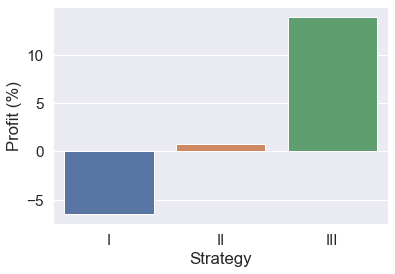

In [22]:
gamblingresult={'Profit (%)':[allgamesfav,allgamesclass,onlydrawsclass],'Strategy':['I','II','III']}
dfgambling=pd.DataFrame(data=gamblingresult)
ax = sns.barplot(x="Strategy", y="Profit (%)", data=dfgambling)
plt.savefig('money_made.png', dpi=600)

## Predicting this week's results

In [23]:
combined_fixlist3=combined_fixlist2.iloc[278:288,:]
combined_fixlist3['Lastseasptdiff']=combined_fixlist3['Pts']-combined_fixlist3['Pts.1']

features3=combined_fixlist3[['ImpliedH','ImpliedD','ImpliedA','Lastseasptdiff','Home Form','Away Form','Poss_x','Poss_y','CrdY_x','CrdY_y']]

predicteddraw_prob2 = regrd.predict_proba(features3)
predictedaway_prob2 = regra.predict_proba(features3)
predictedhome_prob2 = regrh.predict_proba(features3)

predictedhomewin=[0]*len(predicteddraw_prob2[:,0])
predictedawaywin=[0]*len(predicteddraw_prob2[:,0])
predicteddraw=[0]*len(predicteddraw_prob2[:,0])

for i in range(predicteddraw_prob2.shape[0]):
    total=predicteddraw_prob2[i,0]+predictedaway_prob2[i,0]+predictedhome_prob2[i,0]
    predictedhomewin[i]=predictedhome_prob2[i,0]/total
    predictedawaywin[i]=predictedaway_prob2[i,0]/total
    predicteddraw[i]=predicteddraw_prob2[i,0]/total    
    
predh2=np.flipud(predictedhomewin) 
predd2=np.flipud(predicteddraw) 
preda2=np.flipud(predictedawaywin) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
